<a href="https://colab.research.google.com/github/FatemehAbediK/deep-learning-general/blob/main/CNN_mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.17.0


In [3]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [4]:
mnist=keras.datasets.mnist

In [5]:
(x_train,y_train) ,(x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

5


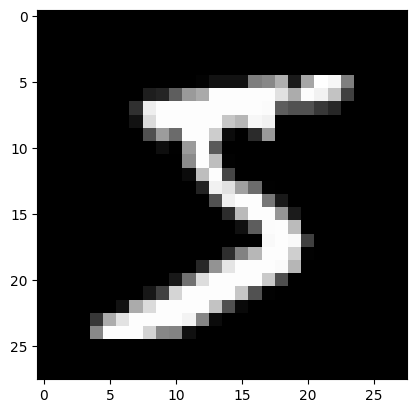

In [7]:
idx=0
image=x_train[idx]
print(y_train[idx])
plt.gray()
plt.imshow(image)


#preprocessing

In [8]:
np.min(image) , np.max(image)

(0, 255)

In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

#model

In [10]:
model=keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256 , activation='relu'))
model.add(keras.layers.Dense(units=256 , activation='relu'))
model.add(keras.layers.Dense(units=10 , activation='softmax'))

In [11]:
model.compile(optimizer='adam' ,metrics=['accuracy'],  loss=tf.losses.sparse_categorical_crossentropy)

In [12]:
model.build(input_shape=(None , 28 , 28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss' , patience=300 , restore_best_weights=True)

In [15]:
hist=model.fit(x_train, y_train , epochs=20,batch_size=256 , callbacks=[early_stop] , validation_data=(x_test,y_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0174 - val_accuracy: 0.9791 - val_loss: 0.0714
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0131 - val_accuracy: 0.9806 - val_loss: 0.0694
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9971 - loss: 0.0108 - val_accuracy: 0.9818 - val_loss: 0.0742
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0100 - val_accuracy: 0.9771 - val_loss: 0.0864
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9771 - val_loss: 0.0829
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9785 - val_loss: 0.0900
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9991 - loss: 0.0043 - val_accuracy: 0.9787 - val_loss: 0.0896
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0069 - val_accuracy: 0.

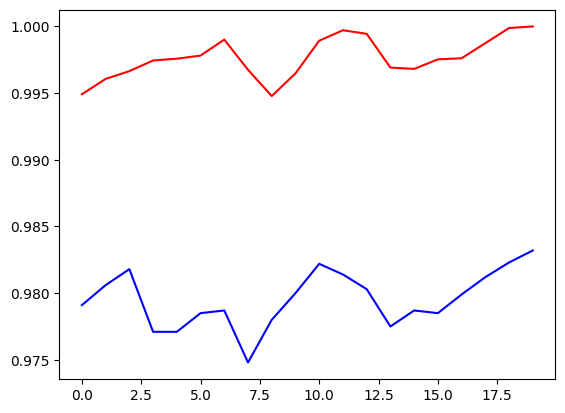

In [16]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']


plt.plot(acc,color='red')
plt.plot(val_acc , color='blue')


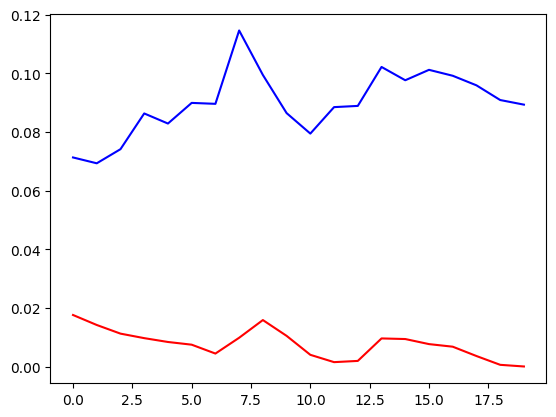

In [17]:
loss=hist.history['loss']
val_loss=j=hist.history['val_loss']


plt.plot(loss,color='red')
plt.plot(val_loss , color='blue')

In [18]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss' , patience=40 , restore_best_weights=True)

In [19]:
hist=model.fit(x_train, y_train , epochs=20 ,batch_size=256 , callbacks=[early_stop] , validation_data=(x_test,y_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0294 - val_accuracy: 0.9770 - val_loss: 0.0764
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9794 - val_loss: 0.0730
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0104 - val_accuracy: 0.9775 - val_loss: 0.0860
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9971 - loss: 0.0098 - val_accuracy: 0.9788 - val_loss: 0.0805
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9797 - val_loss: 0.0756
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9812 - val_loss: 0.0810
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9807 - val_loss: 0.0893
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 0.

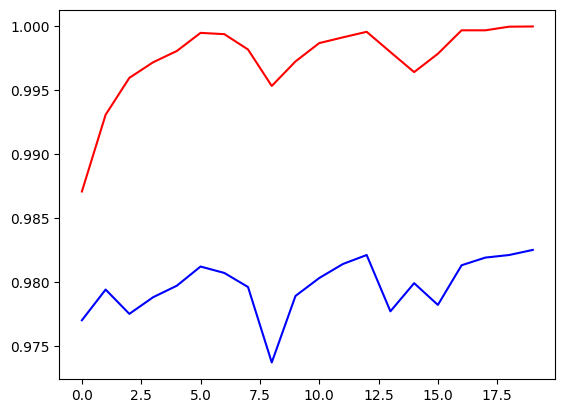

In [20]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

plt.plot(acc,color='red')
plt.plot(val_acc , color='blue')


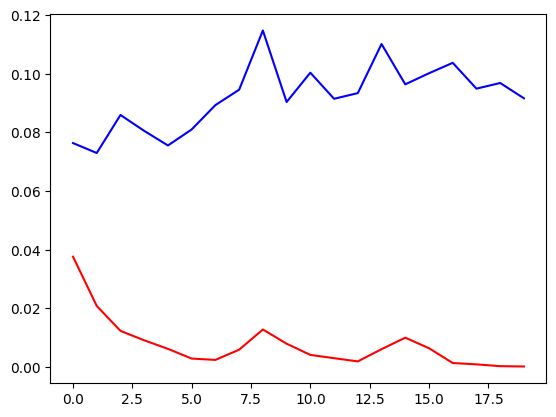

In [21]:
loss=hist.history['loss']
val_loss=j=hist.history['val_loss']

plt.plot(loss,color='red')
plt.plot(val_loss , color='blue')